   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

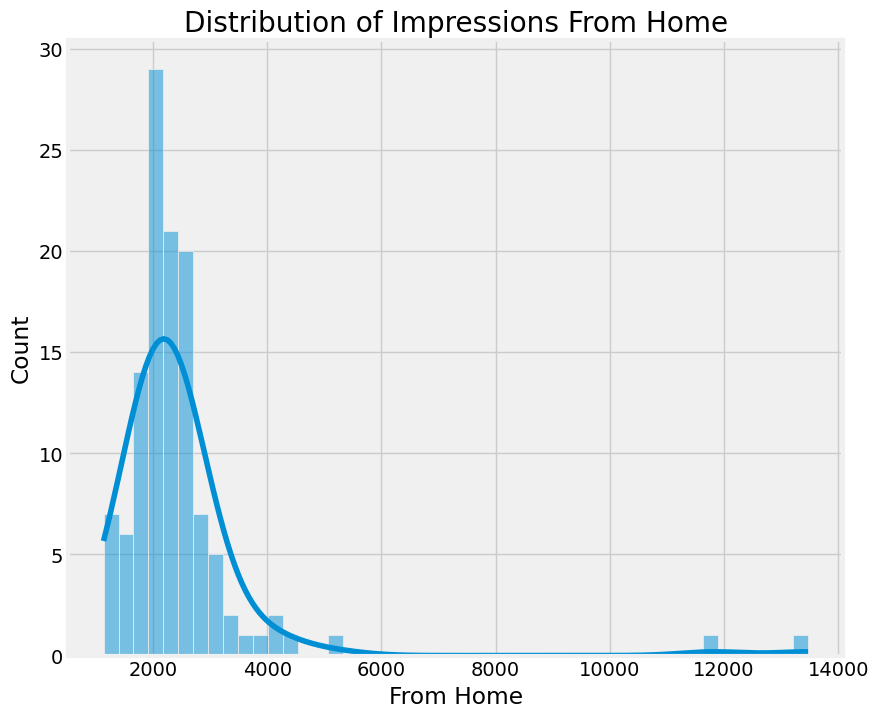

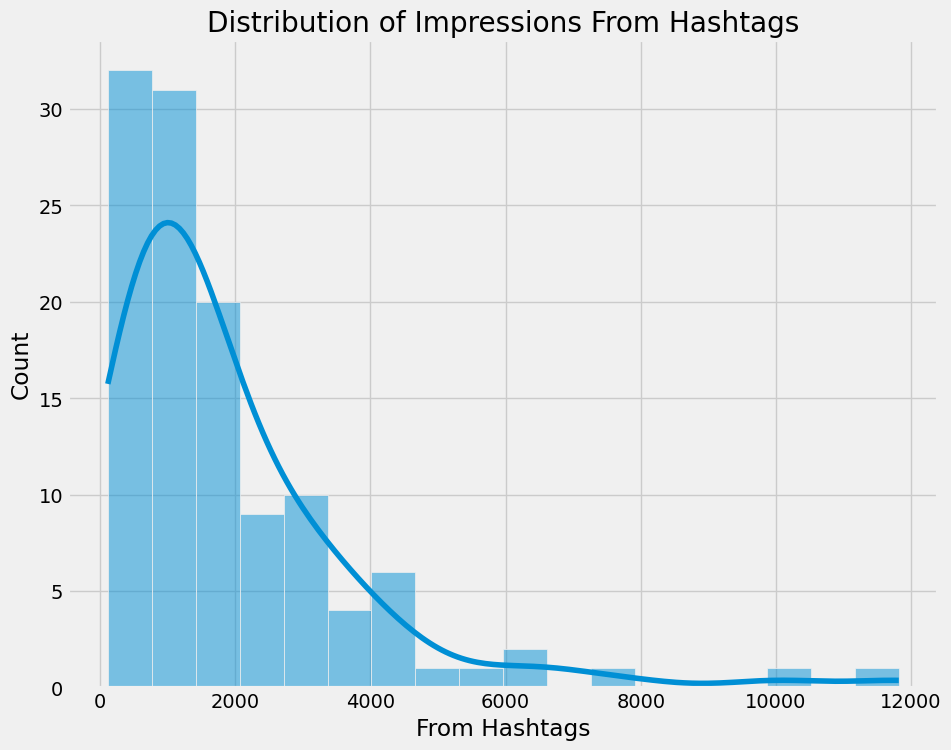

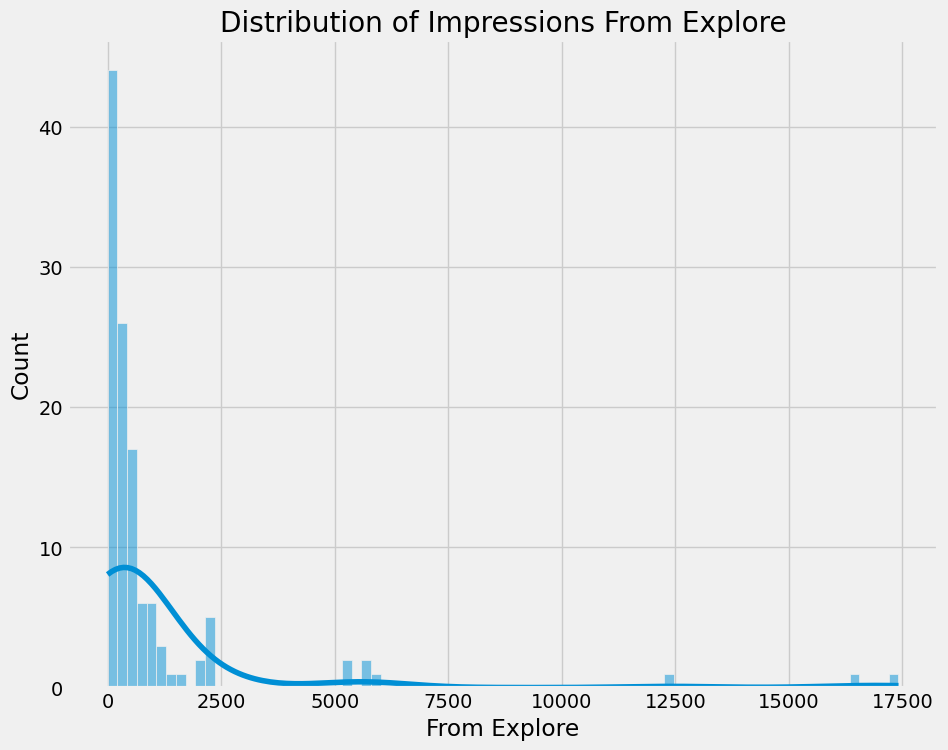

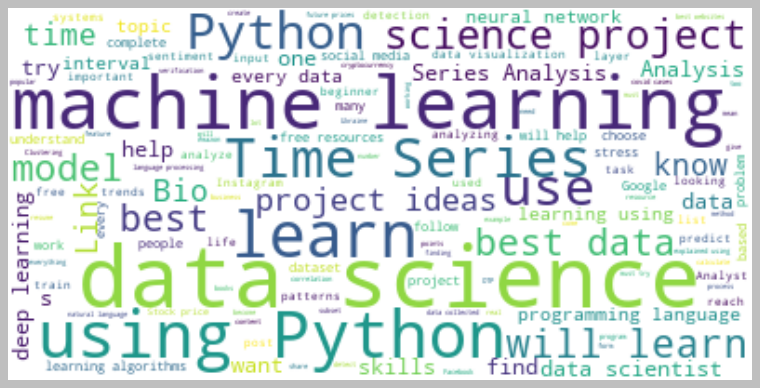

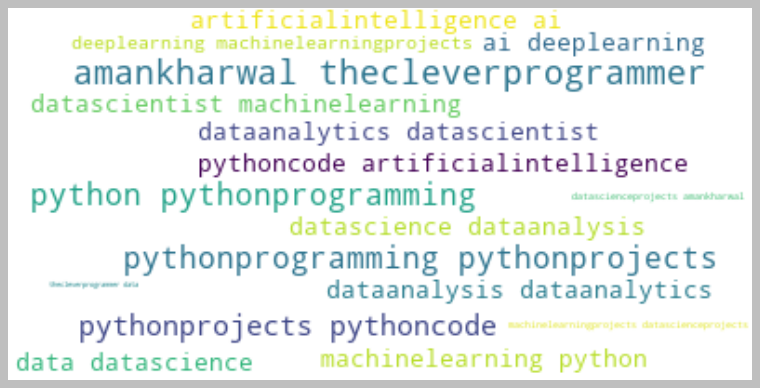

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64
41.00265604249668


array([13880.04389225])

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 31 18:19:02 2023

@author: Yunus
"""
# source: https://statso.io/instagram-reach-analysis-case-study/
# https://thecleverprogrammer.com/2022/03/22/instagram-reach-analysis-using-python/

# pip install wordcloud


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
# pio.renderers.default='svg'
pio.renderers.default='browser'

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram.csv", encoding = 'latin1')
print(data.head())

# whether this dataset contains any null values or not
data.isnull().sum()

# drop all these null values
data = data.dropna()

# understand the data type of all the columns:
data.info()

# Analyzing Instagram Reach
# distribution of impressions received from home
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
# sns.distplot(data['From Home'])
sns.histplot(data['From Home'], kde = True)
plt.show()

# distribution of the impressions received from hashtags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
# sns.distplot(data['From Hashtags'])
sns.histplot(data['From Hashtags'], kde = True)
plt.show()

# distribution of impressions received from the explore section of Instagram
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
# sns.distplot(data['From Explore'])
sns.histplot(data['From Explore'], kde = True)
plt.show()

# the percentage of impressions from various sources on Instagram
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data_frame = data, values=values, names=labels, title='Impressions on Instagram Posts From Various Sources')
fig.show ()


# Content Analysis
# creating a wordcloud of the caption column to look at the most used words in the caption of Instagram posts
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# creating a wordcloud of the hashtags column to look at the most used hashtags in Instagram posts
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Relationships Analysis
# the relationship between the number of likes and the number of impressions on Instagram posts
figure = px.scatter(data_frame = data, x="Impressions", y="Likes", size="Likes", trendline="ols", title = "Relationship Between Likes and Impressions")
figure.show()

# the relationship between the number of comments and the number of impressions on Instagram posts
figure = px.scatter(data_frame = data, x="Impressions", y="Comments", size="Comments", trendline="ols", title = "Relationship Between Comments and Total Impressions")
figure.show()

# the relationship between the number of shares and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions", y="Shares", size="Shares", trendline="ols", title = "Relationship Between Shares and Total Impressions")
figure.show()

# the relationship between the number of saves and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions", y="Saves", size="Saves", trendline="ols", title = "Relationship Between Post Saves and Total Impressions")
figure.show()

# the correlation of all the columns with the Impressions column
correlation = data.corr(numeric_only=True)
print(correlation["Impressions"].sort_values(ascending=False))

# Analyzing Conversion Rate
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

# the relationship between the total profile visits and the number of followers gained from all profile visits
figure = px.scatter(data_frame = data, x="Profile Visits", y="Follows", size="Follows", trendline="ols", title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

# Instagram Reach Prediction Model
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

# Machine learning model to predict the reach of an Instagram post
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

# Predict the reach of an Instagram post by giving inputs to the machine learning model
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)
